![header](https://drive.google.com/uc?export=view&id=1KuEspEp7OwqGw6uMRJvYE6BVE-Zo-8JF)

 <h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Redes Neuronales Convolucionales
### Se hace uso del dataset CIFAR-10 para reconocimiento de 10 objetos
### 0 - airplane
### 1 - automobile
### 2 - bird
### 3 - cat
### 4 - deer
### 5 - dog
### 6 - frog
### 7 - horse
### 8 - ship
### 9 - truck
### https://keras.io/api/datasets/cifar10/

# Se cargan las bibliotecas necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random
     
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
     
from keras.models import Model

np.random.seed(0)

# Se carga el dataset y se verifica el número de muestras en cada set
### Nótese que al hacer la carga, se genera automáticamente el set de entrenamiento y el set de pruebas
### Las imágenes son a color y de 32 por 32 pixeles

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
     
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(type(X_train))

170498071/170498071 [==============================] - 16s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)
<class 'numpy.ndarray'>


# Se verifica el número de muestras por objeto

Text(0, 0.5, 'Número de Muestras')

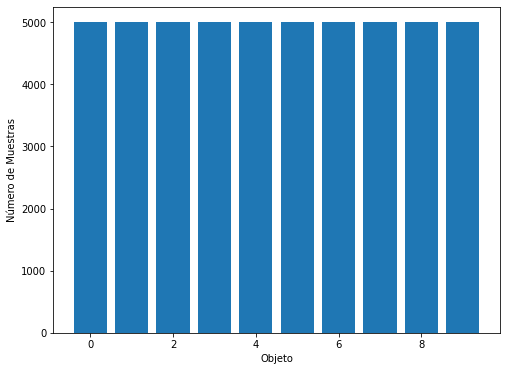

In [3]:
n_muestras = []
n_objetos = 10

for n in range(n_objetos):
    x_sel = X_train[y_train[:,0] == n]
    n_muestras.append(len(x_sel))
plt.figure(figsize=(8,6))
plt.bar(range(0,n_objetos), n_muestras)
plt.xlabel("Objeto")
plt.ylabel("Número de Muestras")

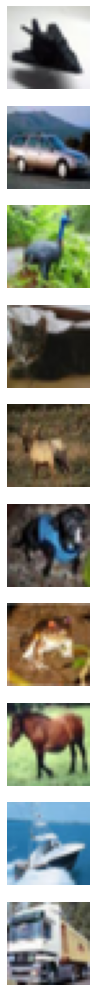

In [4]:
n_objetos = 10

fig, axs = plt.subplots(n_objetos, figsize=(18,18))
for n in range(n_objetos):
    x_sel = X_train[y_train[:,0] == n]
    axs[n].imshow(x_sel[0])
    axs[n].axis('off')

# One-hot Encoding para las etiquetas de ambos sets

In [5]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Se normalizan las intensidades de los pixeles en un intervalo de 0 y 1

In [6]:
X_train = X_train/255 
X_test = X_test/255

# Se define el modelo 
### El parámetro *input_shape* se toma de *X_train* para reflejar las dimensiones de las imágenes a color


In [7]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), input_shape = X_train.shape[1:], activation='relu', padding='same'))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
#model.add(AveragePooling2D())

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu', padding='same'))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(units = 512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 10, activation='softmax'))

model.compile(Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        36928     
                                                        

/usr/local/lib/python3.9/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


# Se separa un 10% del set de entrenamiento para fines de validación

In [8]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs = 10, batch_size = 32, verbose = 1, shuffle = True)

Epoch 1/10
1407/1407 [==============================] - 19s 7ms/step - loss: 1.7180 - accuracy: 0.3537 - val_loss: 1.3670 - val_accuracy: 0.5038
Epoch 2/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.3319 - accuracy: 0.5142 - val_loss: 1.1177 - val_accuracy: 0.6020
Epoch 3/10
1407/1407 [==============================] - 9s 7ms/step - loss: 1.1805 - accuracy: 0.5756 - val_loss: 1.0094 - val_accuracy: 0.6414
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 1.0794 - accuracy: 0.6175 - val_loss: 0.9293 - val_accuracy: 0.6748
Epoch 5/10
1407/1407 [==============================] - 14s 10ms/step - loss: 1.0112 - accuracy: 0.6421 - val_loss: 0.8748 - val_accuracy: 0.6908
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.9540 - accuracy: 0.6626 - val_loss: 0.8091 - val_accuracy: 0.7106
Epoch 7/10
1407/1407 [==============================] - 9s 7ms/step - loss: 0.9205 - accuracy: 0.6775 - val_loss: 0.7929 - val_accu

In [9]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.8084 - accuracy: 0.7217
Test loss: 0.8084275126457214
Test accuracy: 0.7217000126838684


Text(0.5, 0, 'epoch')

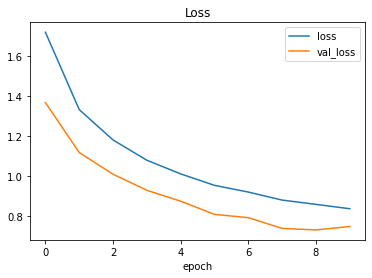

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

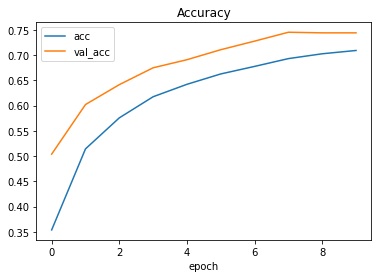

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['acc', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

# Se somete a prueba con una imagen de la web

In [ ]:
import requests
from PIL import Image
     
url = 
response = requests.get(url, stream=True)
img = Image.open(response.raw)

In [ ]:
import cv2
     
img_arr = np.asarray(img)
img_rs = cv2.resize(img_arr, (32, 32, 3))
plt.imshow(img_rs)

In [ ]:
prediction = np.argmax(model.predict(img_rs), axis=-1)
print("objeto:", str(prediction))

# Gracias por la atención